In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import statsmodels.api as sm

In [3]:
#글꼴 설치 - 실행 후 런타임 다시 시작 필요
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

### Step 1. Data Preprocessing

In [4]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [5]:
ROOT = '/content/drive/MyDrive/Colab Notebooks/DM/HW' 
data = pd.read_csv(f'{ROOT}/논문참조_data.csv', encoding = 'cp949')
data.shape

(365, 29)

In [6]:
data.head()

,날짜,이산화질소농도,오존농도,이산화탄소농도,아황산가스,미세먼지,초미세먼지,평균기온,최고기온,일강수량,...,평균전운량,99강수,안개계속시간,미세먼지_기준,초미세먼지_기준,강수여부,적설여부,안개여부,휴일여부,따릉이
0,2019-01-01,0.033,0.016,0.5,0.003,42,27,-5.0,-0.6,0.0,...,3.4,0.0,0.0,2,2,0,0,0,1,8601
1,2019-01-02,0.043,0.010,0.6,0.004,36,24,-4.9,0.2,0.0,...,0.0,0.0,0.0,2,2,0,0,0,0,14360
2,2019-01-03,0.049,0.008,0.6,0.004,33,22,-3.5,3.2,0.0,...,0.1,0.0,0.0,2,2,0,0,0,0,16344
3,2019-01-04,0.065,0.005,1.0,0.005,55,42,-1.1,4.1,0.0,...,5.5,0.0,0.0,2,3,0,0,0,0,17308
4,2019-01-05,0.034,0.017,0.6,0.004,60,41,-2.8,1.1,0.0,...,0.5,0.0,0.0,2,3,0,0,0,1,12380


In [7]:
data.describe()

,이산화질소농도,오존농도,이산화탄소농도,아황산가스,미세먼지,초미세먼지,평균기온,최고기온,일강수량,최대풍속,...,평균전운량,99강수,안개계속시간,미세먼지_기준,초미세먼지_기준,강수여부,적설여부,안개여부,휴일여부,따릉이
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.030026,0.024042,0.470411,0.003345,43.216438,26.328767,13.598904,18.602192,2.441918,4.286849,...,4.899178,2.441918,0.023233,1.778082,2.002740,0.268493,0.010959,0.010959,0.317808,52346.005479
std,0.013313,0.012134,0.171775,0.000859,24.809931,18.804996,10.184196,10.335448,8.152076,1.072120,...,2.979421,7.505520,0.295512,0.586067,0.716749,0.443784,0.104252,0.104252,0.466264,27256.890686
min,0.008000,0.003000,0.200000,0.002000,8.000000,3.000000,-7.900000,-4.500000,0.000000,1.800000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2010.000000
25%,0.019750,0.014000,0.400000,0.003000,28.000000,16.000000,4.300000,9.300000,0.000000,3.500000,...,2.300000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,26046.000000
50%,0.027000,0.023000,0.400000,0.003000,37.000000,22.000000,14.700000,20.200000,0.000000,4.200000,...,4.900000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,54162.000000
75%,0.039000,0.034000,0.600000,0.004000,51.000000,32.000000,23.000000,27.800000,0.200000,4.900000,...,7.500000,0.200000,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,78874.000000
max,0.071000,0.059000,1.300000,0.006000,183.000000,137.000000,31.600000,36.800000,63.200000,11.800000,...,10.000000,49.600000,5.330000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,95859.000000


In [8]:
data.isnull().sum() # 결측치 없음

날짜          0
이산화질소농도     0
오존농도        0
이산화탄소농도     0
아황산가스       0
미세먼지        0
초미세먼지       0
평균기온        0
최고기온        0
일강수량        0
최대풍속        0
평균풍속        0
최소상대습도      0
평균상대습도      0
가조시간        0
합계일조시간      0
1시간최다일사량    0
합계일사량       0
일최심적설       0
평균전운량       0
99강수        0
안개계속시간      0
미세먼지_기준     0
초미세먼지_기준    0
강수여부        0
적설여부        0
안개여부        0
휴일여부        0
따릉이         0
dtype: int64

In [9]:
data.drop(['초미세먼지_기준', '강수여부', '적설여부', '안개여부'], axis = 1, inplace = True)

* 미세먼지_기준, 휴일여부 : 파생변수

In [10]:
data.head()

,날짜,이산화질소농도,오존농도,이산화탄소농도,아황산가스,미세먼지,초미세먼지,평균기온,최고기온,일강수량,...,합계일조시간,1시간최다일사량,합계일사량,일최심적설,평균전운량,99강수,안개계속시간,미세먼지_기준,휴일여부,따릉이
0,2019-01-01,0.033,0.016,0.5,0.003,42,27,-5.0,-0.6,0.0,...,7.5,1.42,7.84,0.0,3.4,0.0,0.0,2,1,8601
1,2019-01-02,0.043,0.010,0.6,0.004,36,24,-4.9,0.2,0.0,...,8.7,1.81,10.48,0.0,0.0,0.0,0.0,2,0,14360
2,2019-01-03,0.049,0.008,0.6,0.004,33,22,-3.5,3.2,0.0,...,8.7,1.79,10.28,0.0,0.1,0.0,0.0,2,0,16344
3,2019-01-04,0.065,0.005,1.0,0.005,55,42,-1.1,4.1,0.0,...,3.9,1.27,6.20,0.0,5.5,0.0,0.0,2,0,17308
4,2019-01-05,0.034,0.017,0.6,0.004,60,41,-2.8,1.1,0.0,...,8.6,1.78,10.05,0.0,0.5,0.0,0.0,2,1,12380


결측치 없으므로 결측치 처리 생략

In [11]:
mean_value = data['따릉이'].mean()

In [12]:
data['따릉이'] = [1 if x > mean_value else 0 for x in data['따릉이']]

In [13]:
data.head()

,날짜,이산화질소농도,오존농도,이산화탄소농도,아황산가스,미세먼지,초미세먼지,평균기온,최고기온,일강수량,...,합계일조시간,1시간최다일사량,합계일사량,일최심적설,평균전운량,99강수,안개계속시간,미세먼지_기준,휴일여부,따릉이
0,2019-01-01,0.033,0.016,0.5,0.003,42,27,-5.0,-0.6,0.0,...,7.5,1.42,7.84,0.0,3.4,0.0,0.0,2,1,0
1,2019-01-02,0.043,0.010,0.6,0.004,36,24,-4.9,0.2,0.0,...,8.7,1.81,10.48,0.0,0.0,0.0,0.0,2,0,0
2,2019-01-03,0.049,0.008,0.6,0.004,33,22,-3.5,3.2,0.0,...,8.7,1.79,10.28,0.0,0.1,0.0,0.0,2,0,0
3,2019-01-04,0.065,0.005,1.0,0.005,55,42,-1.1,4.1,0.0,...,3.9,1.27,6.20,0.0,5.5,0.0,0.0,2,0,0
4,2019-01-05,0.034,0.017,0.6,0.004,60,41,-2.8,1.1,0.0,...,8.6,1.78,10.05,0.0,0.5,0.0,0.0,2,1,0


### Step 2. EDA

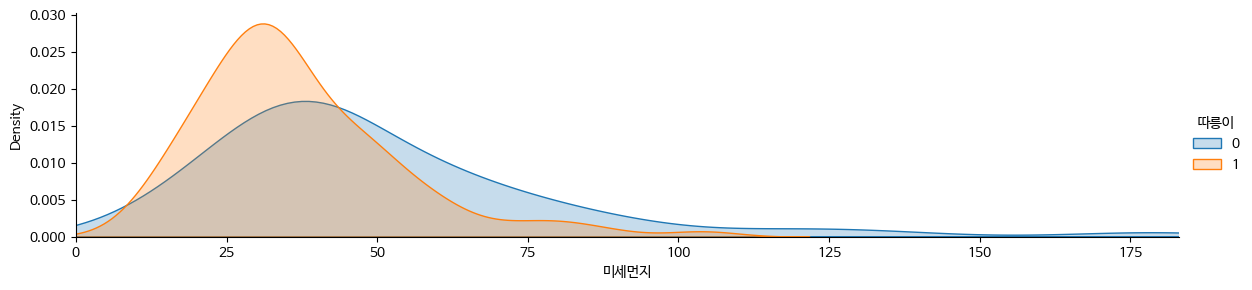

In [14]:
facet2 = sns.FacetGrid(data, hue="따릉이", aspect=4)
facet2.map(sns.kdeplot, '미세먼지', shade=True)
facet2.set(xlim=(0, data['미세먼지'].max()))
facet2.add_legend()

plt.show()

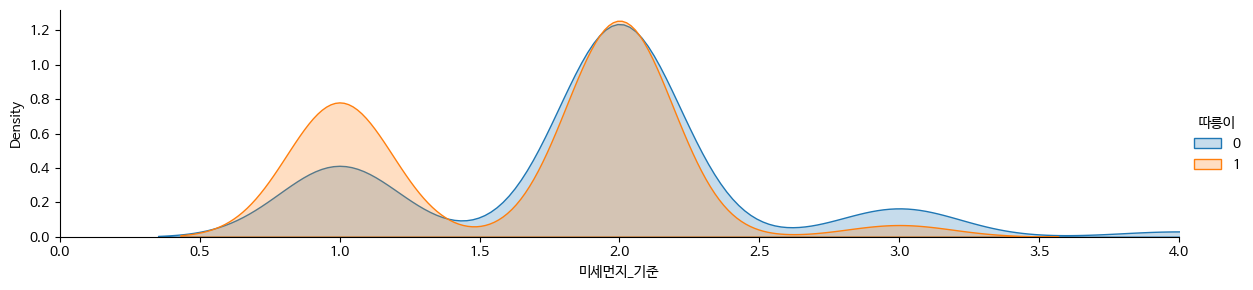

In [15]:
facet = sns.FacetGrid(data, hue = "따릉이", aspect = 4)
facet.map(sns.kdeplot, '미세먼지_기준', shade=True)
facet.set(xlim=(0, data['미세먼지_기준'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

plt.show()

In [16]:
data['미세먼지_기준'].value_counts()

2    231
1    109
3     22
4      3
Name: 미세먼지_기준, dtype: int64

In [17]:
# 특정 feature에 따른 따릉이 비교 (0: 적게탐, 1: 많이탐) 함수
def bar_chart(feature):
    utilized = data[data['따릉이']==1][feature].value_counts()
    unutilized = data[data['따릉이']==0][feature].value_counts()
    df_utilized = pd.DataFrame([utilized,unutilized])
    df_utilized.index = ['utilized','unutilized']
    df_utilized.plot(kind='bar',stacked=True, figsize=(10,5))

휴일여부
0    0.534137
1    0.456897
Name: 따릉이, dtype: float64

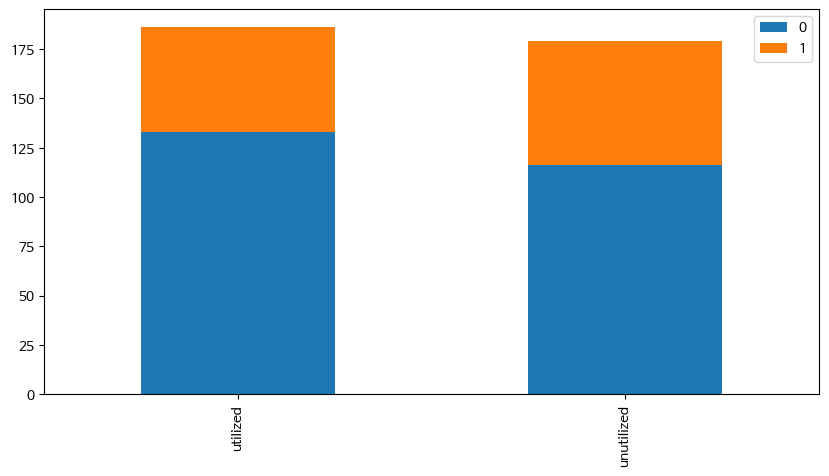

In [18]:
# 휴일 여부에 따른 많이탐 빈도
bar_chart('휴일여부') # 휴일일 때 따릉이를 적게 타는 날의 비율이 더 높아짐
data.groupby(['휴일여부'])['따릉이'].agg(lambda x: x.sum()/x.count())

미세먼지_기준
1    0.633028
2    0.480519
3    0.272727
4    0.000000
Name: 따릉이, dtype: float64

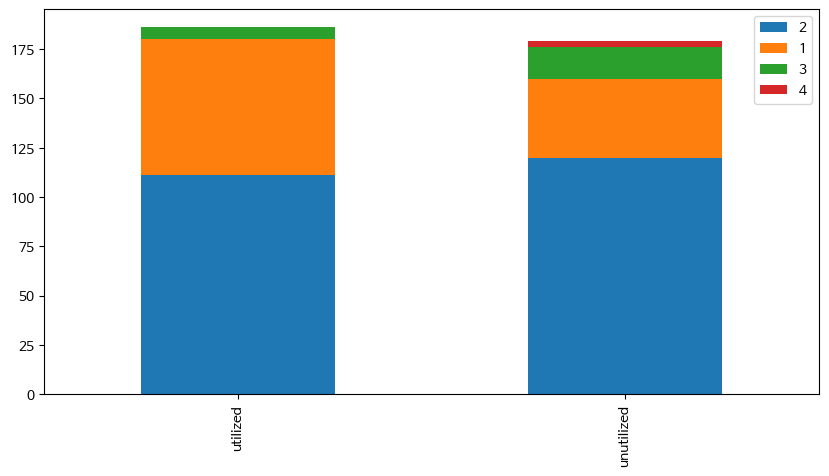

In [19]:
# 미세먼지에 따른 많이탐 빈도
bar_chart('미세먼지_기준') #
data.groupby(['미세먼지_기준'])['따릉이'].agg(lambda x: x.sum()/x.count())

In [20]:
x1_train = data.drop(["날짜", "따릉이"], axis = 1)
y1_train = data["따릉이"]
feature_names = x1_train.columns

selected_variables = [] ## 선택된 변수들
sl_enter = 0.05 # selection level 기준값
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(feature_names) > 0:
    remainder = list(set(feature_names) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = x1_train[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y1_train,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y1_train,sm.add_constant(x1_train[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [21]:
selected_variables

['최고기온', '99강수', '합계일조시간', '초미세먼지', '일강수량', '미세먼지_기준', '휴일여부']

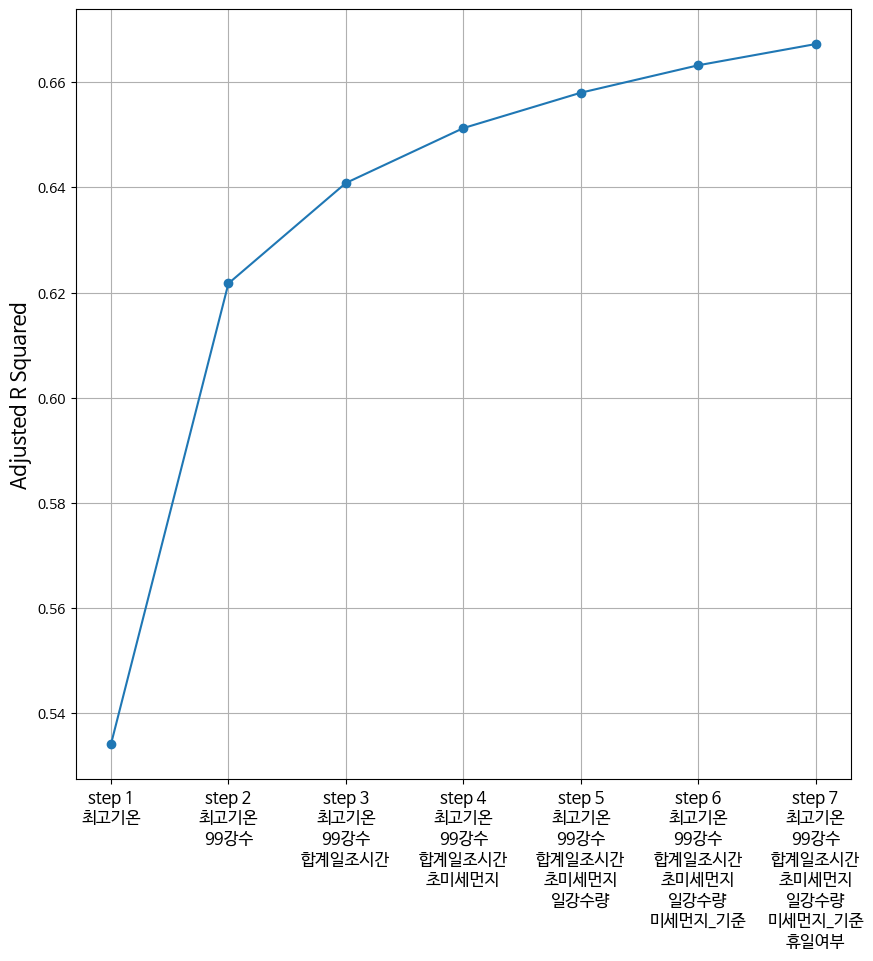

In [22]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

범주형 변수를 제외한 5가지에 대해 VIF 계산
최고기온과 일조시간의 VIF가 3을 살짝 넘긴 하지만 10을 넘을 정도로 매우 큰 값은 아니므로 5개 전부 포함

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Use variance inflation factor to identify any significant multi-collinearity
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)


calc_vif(data[selected_variables].drop(['미세먼지_기준', '휴일여부'], axis = 1).astype(float))

,variables,VIF
0,최고기온,3.608792
1,99강수,2.099618
2,합계일조시간,3.671065
3,초미세먼지,1.987403
4,일강수량,2.030607


<Axes: >

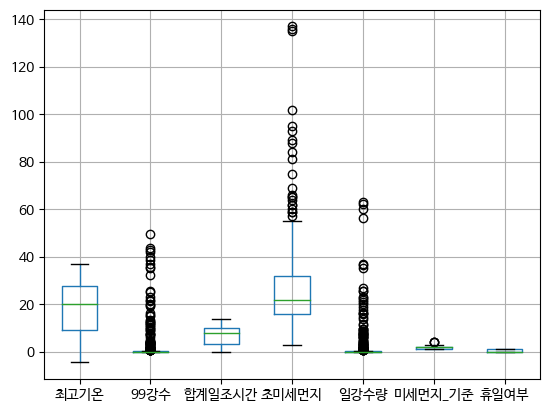

In [24]:
data[selected_variables].boxplot()

<Axes: >

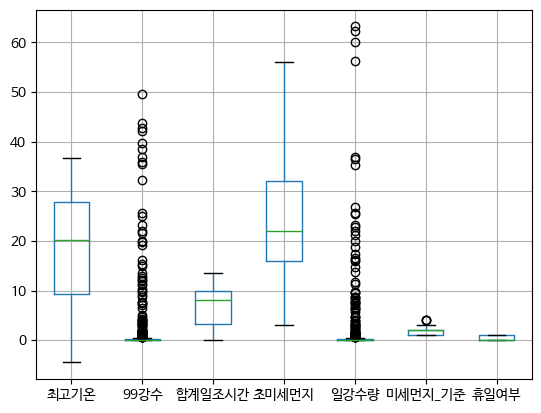

In [25]:
# 99강수, 일강수량 : 0 제외하고 전부 아웃라이어이므로 수정 x
# 미세먼지_기준 : categorical variable이므로 수정 x
# 초미세먼지 : 아웃라이어들을 q3 + 1.5 * IQR로 수정
q1 = data['초미세먼지'].quantile(0.25)
q3 = data['초미세먼지'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data['초미세먼지'] = data['초미세먼지'].clip(lower=lower_bound, upper=upper_bound)

# 결과 출력
data[selected_variables].boxplot()

In [26]:
# 범주형 변수 더미화
data_dummy = pd.get_dummies(data[selected_variables], columns = ['미세먼지_기준', '휴일여부'], drop_first=True) # 두 변수 간 correaltion =1이 되는 것을 방지


### Step 3. Logistic Regression

In [27]:
train_features = data_dummy
train_target = data['따릉이']
#train_target = train_target.astype('int') #모델 실행시 데이터 타입 차이로 인한 오류 방지

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_features, train_target, test_size = 0.2, random_state = 312)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = 312, stratify=y_train)
print("train set:",x_train.shape)
print("valid set:",x_valid.shape)
print("test set:",x_test.shape)
print("train set:",y_train.shape)
print("valid set:",y_valid.shape)
print("test set:",y_test.shape)

train set: (233, 9)
valid set: (59, 9)
test set: (73, 9)
train set: (233,)
valid set: (59,)
test set: (73,)


In [29]:
y_train.value_counts()

1    121
0    112
Name: 따릉이, dtype: int64

In [30]:
from imblearn.under_sampling import RandomUnderSampler
x_train, y_train = RandomUnderSampler(random_state=312, sampling_strategy='majority').fit_resample(x_train, y_train) #비율 맞추기

In [31]:
y_train.value_counts()

0    112
1    112
Name: 따릉이, dtype: int64

In [32]:
# statsmodel에는 constant가 자동으로 생기지 않아 직접 추가하여야 함

x_train = sm.add_constant(x_train)
x_valid = sm.add_constant(x_valid)
x_test = sm.add_constant(x_test)

In [33]:
model_sm = sm.Logit(y_train, x_train).fit()
# model_sm = smf.logit("y 변수명 ~ X변수1 + X변수2", data=데이터프레임).fit()의 형태로도 fit 가능

# maximum likelihood를 사용하는 과정에서 loss function이 최소화 되도록 coeff. 값을 수정하게 되는데, 베타값이 converge 할 수 있도록 iteration을 돌리는데 몇변 돌렸는지 표시해줌

Optimization terminated successfully.
         Current function value: 0.232170
         Iterations 33


### Step 4. Evaluation

In [34]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [35]:
# Probability 값
predict_prob = model_sm.predict(x_valid)

Text(0, 0.5, 'Log-odds')

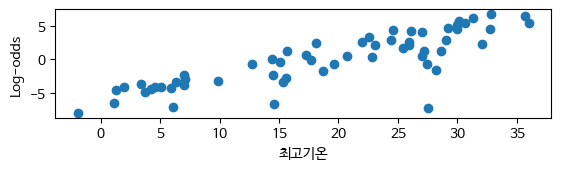

In [36]:
import numpy as np
# Getting log odds values
log_odds = np.log(predict_prob / (1 - predict_prob))

# np.log (성공할 확률 / 실패할 확률)
# Visualize predictor variable vs logit values for Fare
plt.subplot(311)
plt.scatter(x=x_valid['최고기온'].values, y=log_odds)
plt.xlabel("최고기온")
plt.ylabel("Log-odds")

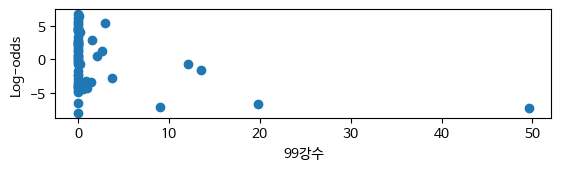

In [37]:
# 독립변수(Sex_male)와 log odd간의 관계 시각화
plt.subplot(312)
plt.scatter(x=x_valid['99강수'].values, y=log_odds)
plt.xlabel("99강수")
plt.ylabel("Log-odds")
plt.show()

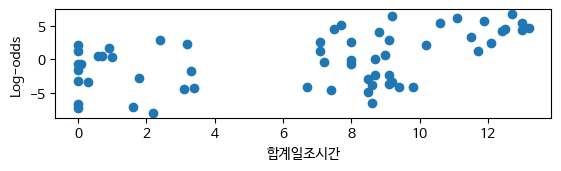

In [38]:
# 독립변수(Sex_male)와 log odd간의 관계 시각화
plt.subplot(312)
plt.scatter(x=x_valid['합계일조시간'].values, y=log_odds)
plt.xlabel("합계일조시간")
plt.ylabel("Log-odds")
plt.show()

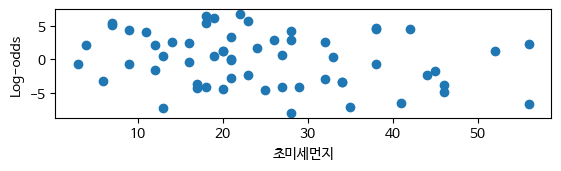

In [39]:
# 독립변수(Sex_male)와 log odd간의 관계 시각화
plt.subplot(312)
plt.scatter(x=x_valid['초미세먼지'].values, y=log_odds)
plt.xlabel("초미세먼지")
plt.ylabel("Log-odds")
plt.show()

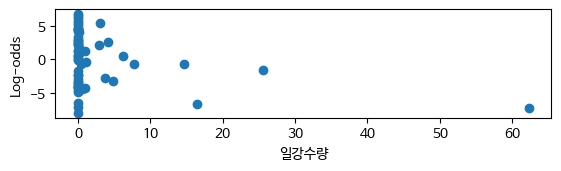

In [40]:
# 독립변수(Sex_male)와 log odd간의 관계 시각화
plt.subplot(312)
plt.scatter(x=x_valid['일강수량'].values, y=log_odds)
plt.xlabel("일강수량")
plt.ylabel("Log-odds")
plt.show()

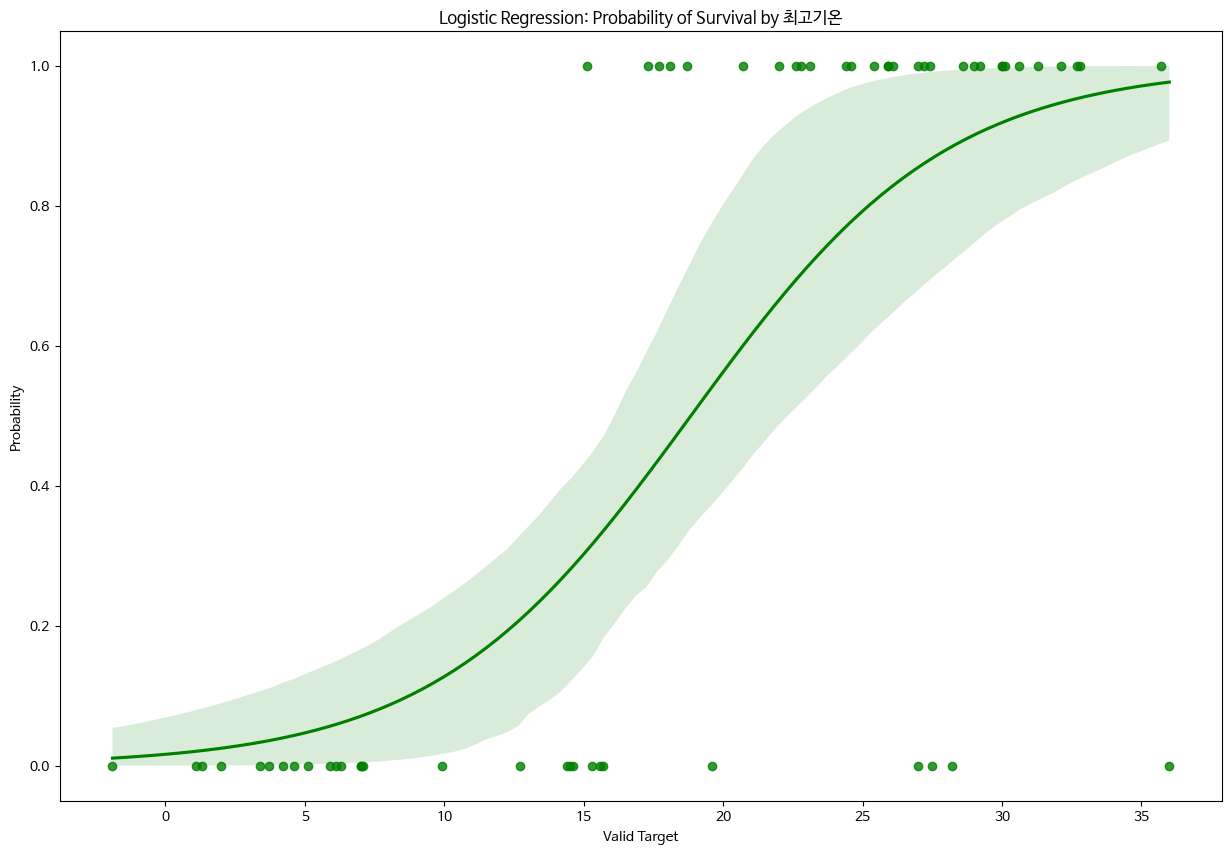

In [41]:
def ap_log_regplot(ap_X, ap_y):
    plt.figure(figsize=(15,10))
    sns.regplot(x=ap_X, y=ap_y, logistic=True, color='green')
    return None

ap_log_regplot(x_valid['최고기온'], y_valid)
plt.xlabel('Valid Target')
plt.ylabel('Probability')
plt.title('Logistic Regression: Probability of Survival by 최고기온')
plt.show()


/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


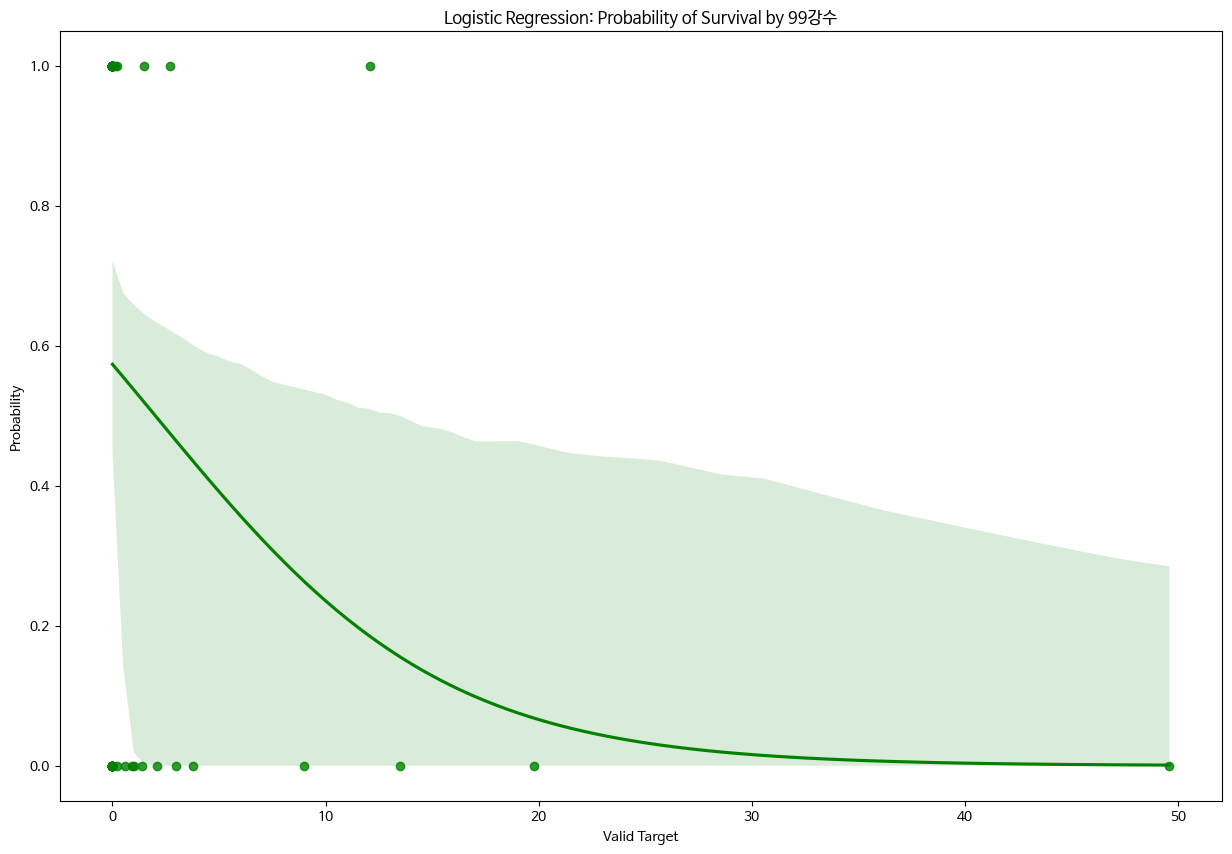

In [42]:
ap_log_regplot(x_valid['99강수'], y_valid)
plt.xlabel('Valid Target')
plt.ylabel('Probability')
plt.title('Logistic Regression: Probability of Survival by 99강수')
plt.show()


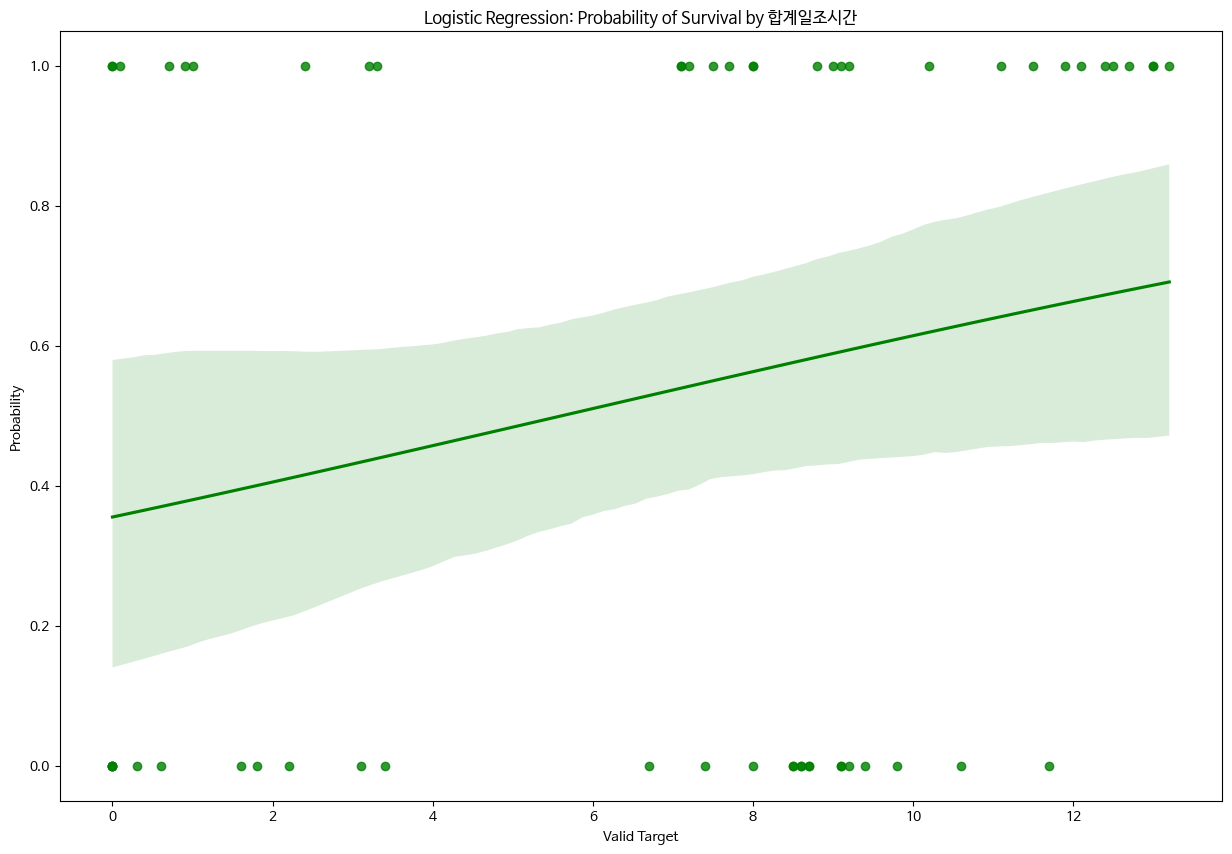

In [43]:
ap_log_regplot(x_valid['합계일조시간'], y_valid)
plt.xlabel('Valid Target')
plt.ylabel('Probability')
plt.title('Logistic Regression: Probability of Survival by 합계일조시간')
plt.show()


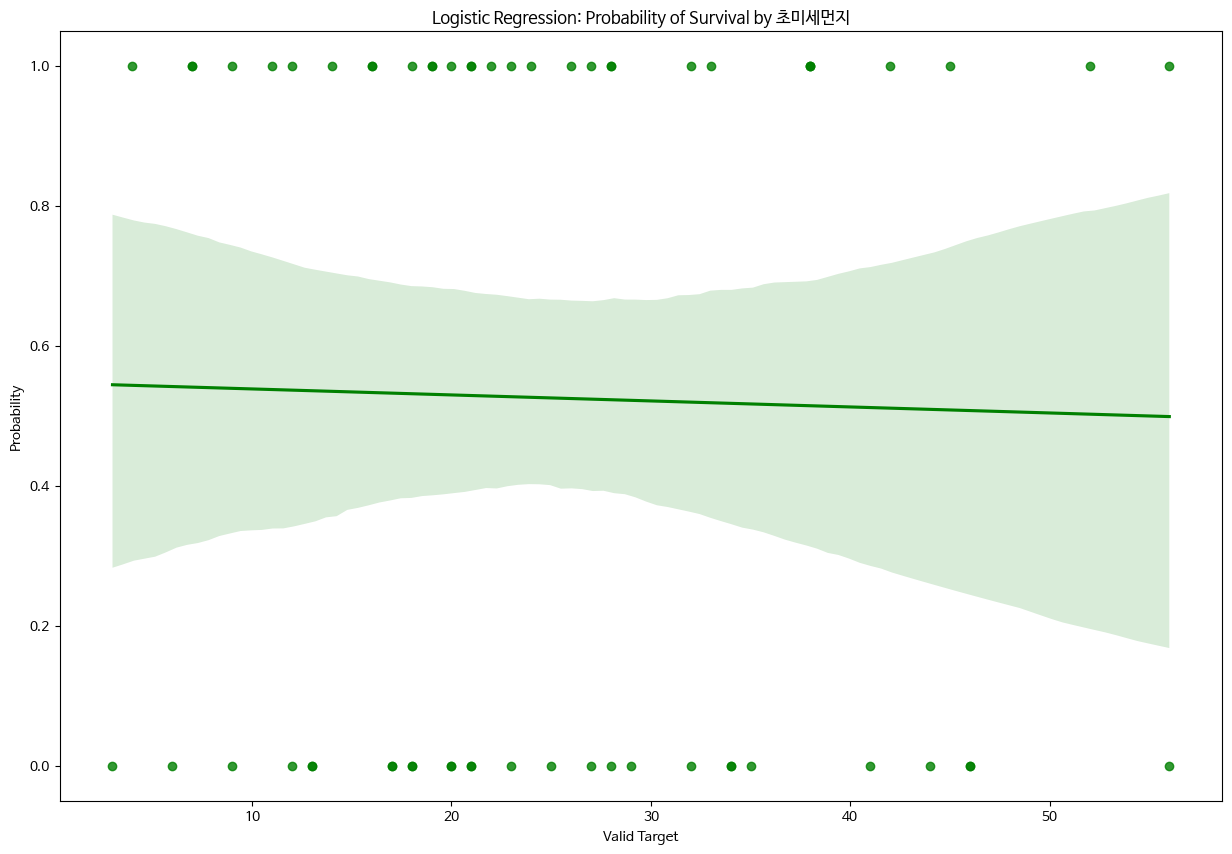

In [44]:
ap_log_regplot(x_valid['초미세먼지'], y_valid)
plt.xlabel('Valid Target')
plt.ylabel('Probability')
plt.title('Logistic Regression: Probability of Survival by 초미세먼지')
plt.show()


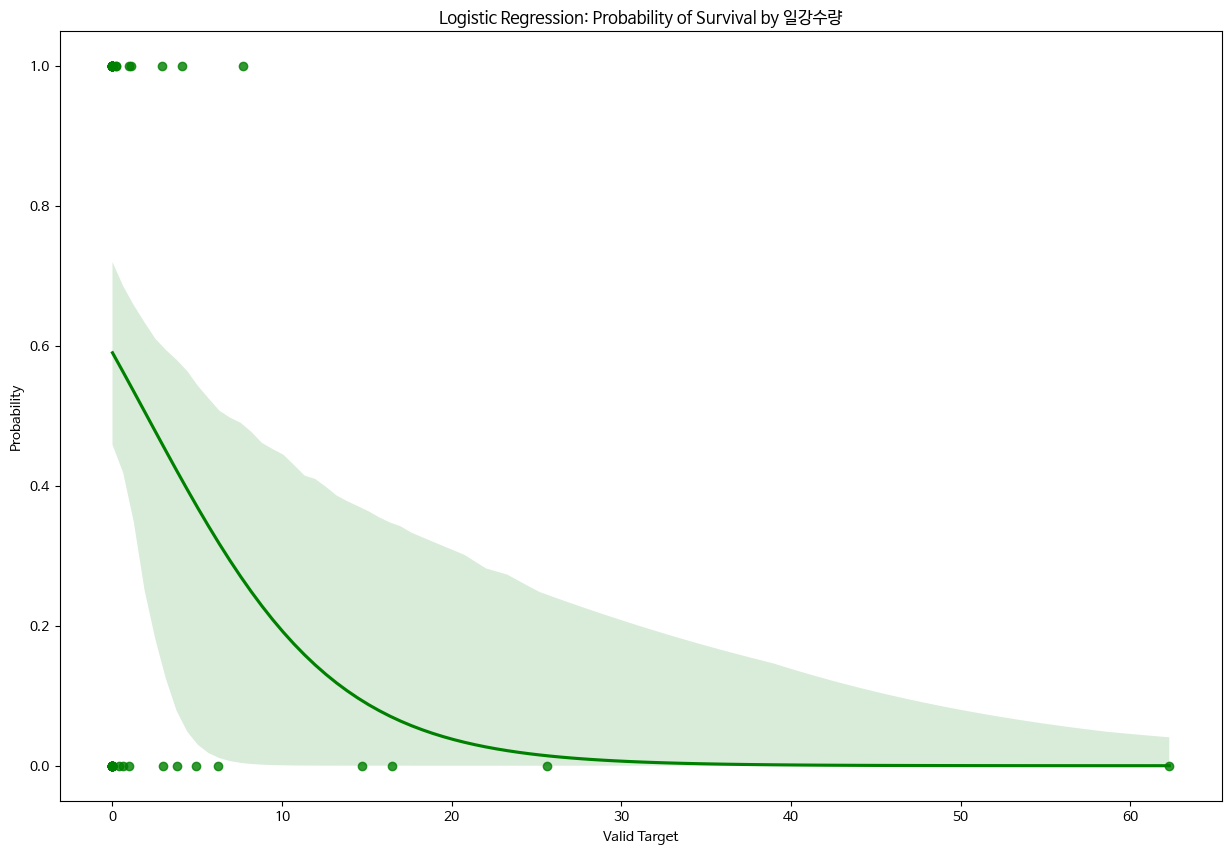

In [45]:
ap_log_regplot(x_valid['일강수량'], y_valid)
plt.xlabel('Valid Target')
plt.ylabel('Probability')
plt.title('Logistic Regression: Probability of Survival by 일강수량')
plt.show()


In [46]:
# 경계값cut off value에 따라 0,1 값 변환
# cut off value = 모델에서 positive 클래스로 분류될 확률 값의 기준. 이진 분류에서 활용
## decision boundary = 클래스를 분리하는 경계선. 이진 및 다중 분류에서 활용
def change_cutoff(pred_prob_y, cutoff):
    Y_change = pred_prob_y.copy()
    Y_change[Y_change > cutoff] = 1
    Y_change[Y_change <= cutoff] = 0
    return(Y_change.astype(int))

In [52]:
def checkacc(threshold):
    tn, fp, fn, tp = confusion_matrix(y_valid, change_cutoff(predict_prob, threshold)).ravel()
    specificity = tn / (tn + fp)

    print(confusion_matrix(y_valid, change_cutoff(predict_prob, threshold)))
    print(" Accuracy:", accuracy_score(y_valid, change_cutoff(predict_prob, threshold)))
    print("Specificity:", specificity)
    print("Precision:", precision_score(y_valid, change_cutoff(predict_prob, threshold)))
    print("   Recall:", recall_score(y_valid, change_cutoff(predict_prob, threshold)))
    print(" F1 score:", f1_score(y_valid, change_cutoff(predict_prob, threshold)))

In [53]:
for i in range(1, 10):
    print(i/10)
    checkacc(i/10)
    print()

0.1
[[21  7]
 [ 0 31]]
 Accuracy: 0.8813559322033898
Specificity: 0.75
Precision: 0.8157894736842105
   Recall: 1.0
 F1 score: 0.898550724637681

0.2
[[22  6]
 [ 1 30]]
 Accuracy: 0.8813559322033898
Specificity: 0.7857142857142857
Precision: 0.8333333333333334
   Recall: 0.967741935483871
 F1 score: 0.8955223880597015

0.3
[[22  6]
 [ 1 30]]
 Accuracy: 0.8813559322033898
Specificity: 0.7857142857142857
Precision: 0.8333333333333334
   Recall: 0.967741935483871
 F1 score: 0.8955223880597015

0.4
[[24  4]
 [ 2 29]]
 Accuracy: 0.8983050847457628
Specificity: 0.8571428571428571
Precision: 0.8787878787878788
   Recall: 0.9354838709677419
 F1 score: 0.90625

0.5
[[24  4]
 [ 4 27]]
 Accuracy: 0.864406779661017
Specificity: 0.8571428571428571
Precision: 0.8709677419354839
   Recall: 0.8709677419354839
 F1 score: 0.8709677419354839

0.6
[[25  3]
 [ 5 26]]
 Accuracy: 0.864406779661017
Specificity: 0.8928571428571429
Precision: 0.896551724137931
   Recall: 0.8387096774193549
 F1 score: 0.86666666

fprs :  [0.         0.         0.         0.03571429 0.03571429 0.07142857
 0.07142857 0.10714286 0.10714286 0.14285714 0.14285714 0.25
 0.25       1.        ]
tprs :  [0.         0.03225806 0.16129032 0.16129032 0.74193548 0.74193548
 0.80645161 0.80645161 0.87096774 0.87096774 0.96774194 0.96774194
 1.         1.        ]
thresholds :  [1.99882046e+00 9.98820464e-01 9.95597408e-01 9.95308201e-01
 7.86321112e-01 7.80129132e-01 6.73295364e-01 6.33699810e-01
 5.75030565e-01 5.32618822e-01 3.49308102e-01 1.64691901e-01
 1.57077828e-01 3.65169891e-04]


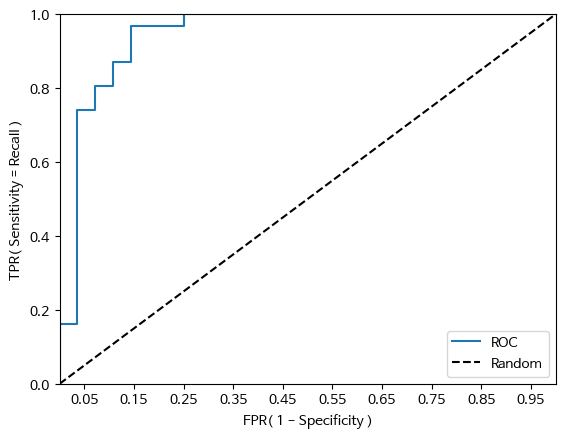

In [54]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , pred_proba_c1):
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1) # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    print("fprs : ", fprs)
    print("tprs : ", tprs)
    print("thresholds : ", thresholds)

    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
  
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Specificity )')
    plt.ylabel('TPR( Sensitivity = Recall )')
    plt.legend()
    plt.show()
  
roc_curve_plot(y_valid, predict_prob)

#좌측 상단에 밀접한 그래프가 나올수록 결과가 잘 나온 것임

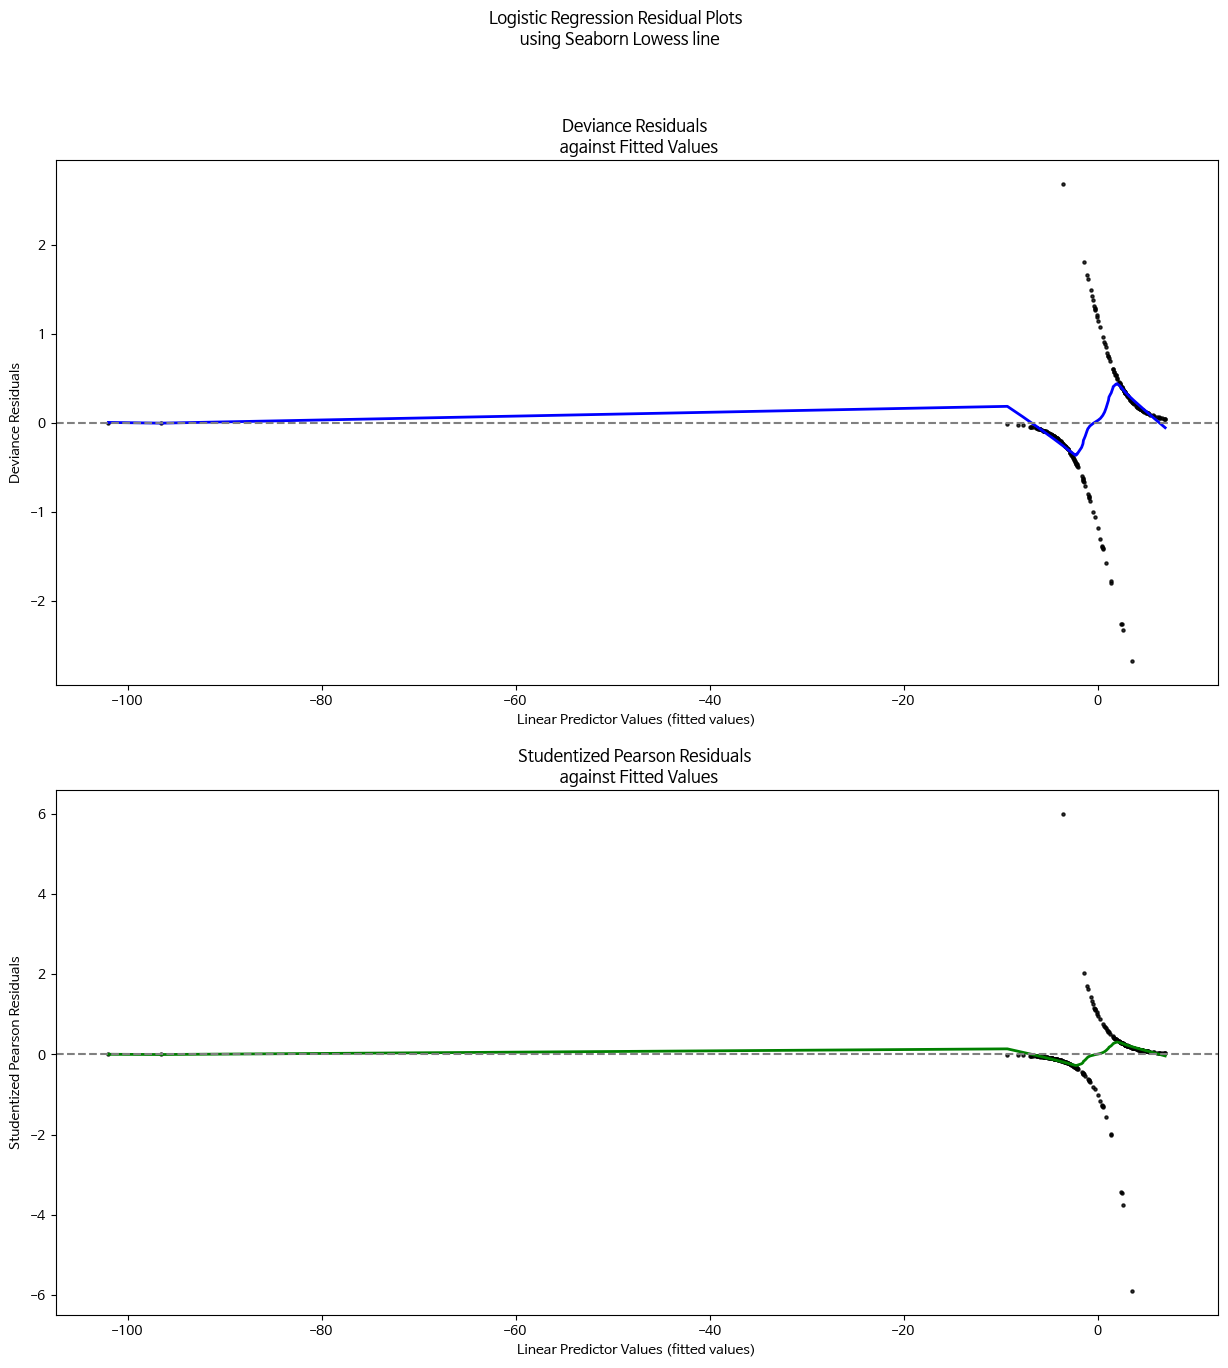

In [55]:
'''
코드 참고: https://www.pythonfordatascience.org/logistic-regression-python/#assumption_check
해석 참고: https://stats.stackexchange.com/questions/1432/what-do-the-residuals-in-a-logistic-regression-mean; https://stats.oarc.ucla.edu/stata/webbooks/logistic/chapter3/lesson-3-logistic-regression-diagnostics-2/
'''

## Plotting multiple plots same figure
fig, (axL, axR) = plt.subplots(2, figsize=(15, 15))
plt.suptitle("Logistic Regression Residual Plots \n using Seaborn Lowess line")

# Deviance Residuals
sns.regplot(x=model_sm.fittedvalues, y=model_sm.resid_dev, ax=axL,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"b", "alpha":1, "lw":2}, lowess=True)

axL.set_title("Deviance Residuals \n against Fitted Values")
axL.set_xlabel("Linear Predictor Values (fitted values)")
axL.set_ylabel("Deviance Residuals")
axL.axhline(y=0, linestyle='--', color='grey')

# Studentized Pearson Residuals
sns.regplot(x=model_sm.fittedvalues, y=model_sm.resid_pearson, ax=axR,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"g", "alpha":1, "lw":2}, lowess=True)

axR.set_title("Studentized Pearson Residuals \n against Fitted Values")
axR.set_xlabel("Linear Predictor Values (fitted values)")
axR.set_ylabel("Studentized Pearson Residuals")
axR.axhline(y=0, linestyle='--', color='grey')
plt.show()

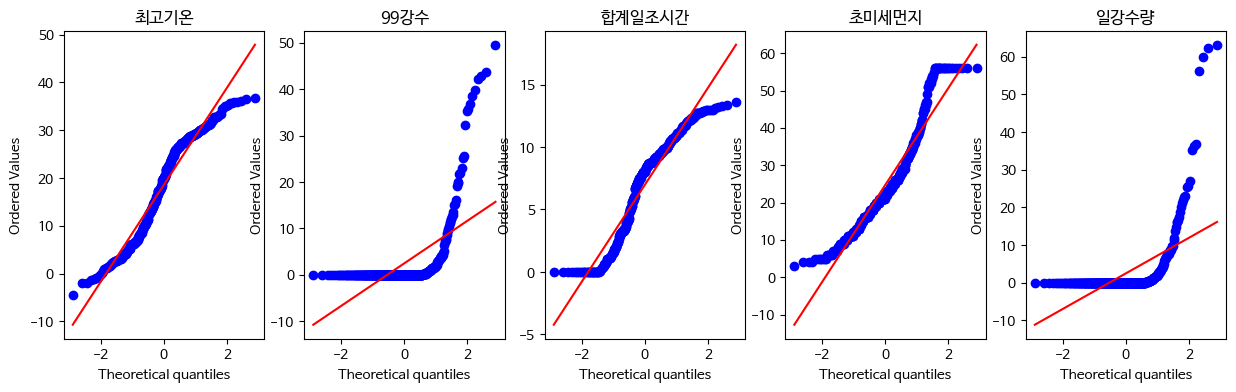

In [56]:
import scipy.stats as stats

# subplot 생성
fig, axes = plt.subplots(1, 5, figsize=(15, 4))

# q-q plot 그리기
for i, col in enumerate(train_features[["최고기온", "99강수", "합계일조시간", "초미세먼지", "일강수량"]].columns):
    stats.probplot(train_features[col], plot=axes[i])
    axes[i].set_title(col)

# 그래프 보여주기
plt.show()

In [57]:
!pip install factor_analyzer # https://pypi.org/project/factor-analyzer/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(train_features[["최고기온", "99강수", "합계일조시간", "초미세먼지", "일강수량"]])
chi_square_value, p_value # p-value < 0.05 --> 귀무가설 기각

(367.4539965111785, 7.840895055551075e-73)

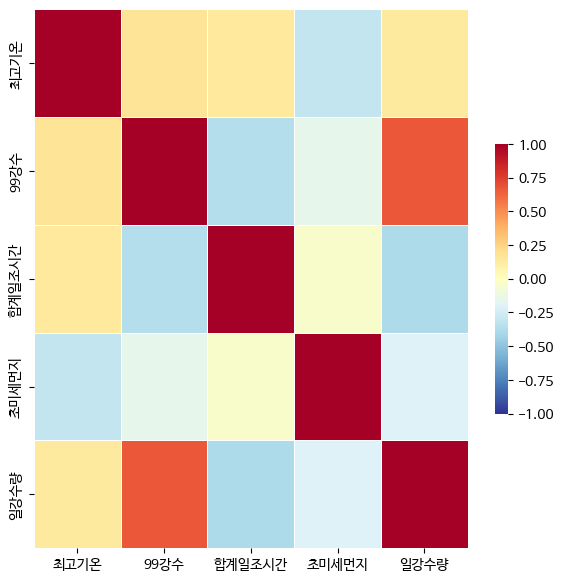

In [59]:
# 변수들관의 상관관계를 corr()로 확인
fig, ax = plt.subplots( figsize=(7,7) )
sns.heatmap(train_features[["최고기온", "99강수", "합계일조시간", "초미세먼지", "일강수량"]].corr(), 
            cmap = 'RdYlBu_r', 
            # annot = True,   # 실제 값을 표시한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

### Step 5. Interpretation

In [60]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    따릉이   No. Observations:                  224
Model:                          Logit   Df Residuals:                      214
Method:                           MLE   Df Model:                            9
Date:                Wed, 19 Apr 2023   Pseudo R-squ.:                  0.6650
Time:                        15:28:34   Log-Likelihood:                -52.006
converged:                       True   LL-Null:                       -155.26
Covariance Type:            nonrobust   LLR p-value:                 1.423e-39
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.6014      1.238     -4.523      0.000      -8.029      -3.174
최고기온           0.3148      0.044      7.145      0.000       0.228       0.401
99강수          -0.1144      0.038     -3.030      0.002      -0.188      -0.040
합계일조시간         0.2207      0.079      2.800      0.005       0.066       0.375
초미세먼지         -0.0644      0.030     -2.124      0.034      -0.124      -0.005
일강수량          -0.0607      0.056     -1.090      0.276      -0.170       0.048
미세먼지_기준_2      0.6322      0.758      0.834      0.404      -0.854       2.118
미세먼지_기준_3      1.2346      1.473      0.838      0.402      -1.652       4.121
미세먼지_기준_4    -94.5226   9.32e+20  -1.01e-19      1.000   -1.83e+21    1.83e+21
휴일여부_1        -1.0285      0.581     -1.770      0.077      -2.168       0.111
==============================================================================
"""

In [61]:
model_sm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                   Results: Logit
=====================================================================================================================
Model:                                Logit                             Pseudo R-squared:                  0.665     
Dependent Variable:                   따릉이                               AIC:                               124.0123  
Date:                                 2023-04-19 15:28                  BIC:                               158.1288  
No. Observations:                     224                               Log-Likelihood:                    -52.006   
Df Model:                             9                                 LL-Null:                           -155.26   
Df Residuals:                         214                               LLR p-value:                       1.4230e-39
Converged:                            1.0000                            Scale:                             1.0000    
No. Iterations:                       33.0000                                                                        
---------------------------------------------------------------------------------------------------------------------
           Coef.            Std.Err.             z    P>|z|             [0.025                       0.975]          
---------------------------------------------------------------------------------------------------------------------
const      -5.6014                     1.2384 -4.5232 0.0000                      -8.0285                     -3.1742
최고기온        0.3148                     0.0441  7.1453 0.0000                       0.2285                      0.4012
99강수       -0.1144                     0.0378 -3.0297 0.0024                      -0.1884                     -0.0404
합계일조시간      0.2207                     0.0788  2.7995 0.0051                       0.0662                      0.3752
초미세먼지      -0.0644                     0.0303 -2.1239 0.0337                      -0.1239                     -0.0050
일강수량       -0.0607                     0.0557 -1.0897 0.2758                      -0.1698                      0.0485
미세먼지_기준_2   0.6322                     0.7582  0.8338 0.4044                      -0.8539                      2.1183
미세먼지_기준_3   1.2346                     1.4729  0.8382 0.4019                      -1.6522                      4.1214
미세먼지_기준_4 -94.5226 931596430646428434432.0000 -0.0000 1.0000 -1825895452193066057728.0000 1825895452193066057728.0000
휴일여부_1     -1.0285                     0.5812 -1.7695 0.0768                      -2.1676                      0.1107
=====================================================================================================================

"""

In [62]:
# Odds ratio
import numpy as np
np.exp(model_sm.params) # reference: (Pclass = 1, Sex = Female)

# log odd여서 exp 취해줘야 함

const        3.692859e-03
최고기온         1.369998e+00
99강수         8.918823e-01
합계일조시간       1.246932e+00
초미세먼지        9.375850e-01
일강수량         9.411214e-01
미세먼지_기준_2    1.881733e+00
미세먼지_기준_3    3.437082e+00
미세먼지_기준_4    8.899113e-42
휴일여부_1       3.575596e-01
dtype: float64